In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
train_df=pd.read_csv('D:\\ANALYTICS\\HACKATHONS\\JANATAHACK-Analytics Vidhya\\train_fNxu4vz.csv')

In [3]:
test_df=pd.read_csv('D:\\ANALYTICS\\HACKATHONS\\JANATAHACK-Analytics Vidhya\\test_fjtUOL8.csv')

In [4]:
train_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [5]:
test_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  109541 non-null  int64  
 1   Loan_Amount_Requested    109541 non-null  object 
 2   Length_Employed          104605 non-null  object 
 3   Home_Owner               92830 non-null   object 
 4   Annual_Income            92643 non-null   float64
 5   Income_Verified          109541 non-null  object 
 6   Purpose_Of_Loan          109541 non-null  object 
 7   Debt_To_Income           109541 non-null  float64
 8   Inquiries_Last_6Mo       109541 non-null  int64  
 9   Months_Since_Deliquency  50682 non-null   float64
 10  Number_Open_Accounts     109541 non-null  int64  
 11  Total_Accounts           109541 non-null  int64  
 12  Gender                   109541 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 10.9+ MB


Length_Employed,Home_owner,Annual_income and Months_Since_Deliquency has null values.Months_Since_Deliquency has   
more than 50% of null values in both train and test dataset.

In [16]:
print(train_df.describe())
print('*'*40)
print(test_df.describe())

            Loan_ID  Annual_Income  Debt_To_Income  Inquiries_Last_6Mo  \
count  1.643090e+05   1.392070e+05   164309.000000       164309.000000   
mean   1.008216e+07   7.333116e+04       17.207189            0.781698   
std    4.743207e+04   6.037750e+04        7.845083            1.034747   
min    1.000000e+07   4.000000e+03        0.000000            0.000000   
25%    1.004108e+07   4.500000e+04       11.370000            0.000000   
50%    1.008216e+07   6.300000e+04       16.840000            0.000000   
75%    1.012323e+07   8.869750e+04       22.780000            1.000000   
max    1.016431e+07   7.500000e+06       39.990000            8.000000   

       Months_Since_Deliquency  Number_Open_Accounts  Total_Accounts  \
count             75930.000000         164309.000000   164309.000000   
mean                 34.229356             11.193818       25.067665   
std                  21.761180              4.991813       11.583067   
min                   0.000000              0

In [17]:
print(train_df.describe(include=['O']))
print('*'*40)
print(test_df.describe(include=['O']))

       Loan_Amount_Requested Length_Employed Home_Owner    Income_Verified  \
count                 164309          156938     138960             164309   
unique                  1290              11          5                  3   
top                   10,000       10+ years   Mortgage  VERIFIED - income   
freq                   11622           52915      70345              59421   

           Purpose_Of_Loan  Gender  
count               164309  164309  
unique                  14       2  
top     debt_consolidation    Male  
freq                 97101  117176  
****************************************
       Loan_Amount_Requested Length_Employed Home_Owner    Income_Verified  \
count                 109541          104605      92830             109541   
unique                  1246              11          5                  3   
top                   10,000       10+ years   Mortgage  VERIFIED - income   
freq                    7820           35413      46925              39

In [20]:
train_df.assign(Length_Employed=train_df.Length_Employed.astype('str')).groupby(['Length_Employed','Interest_Rate']).size().reset_index(name='Count')

,Length_Employed,Interest_Rate,Count
0,1 year,1,2265
1,1 year,2,4600
2,1 year,3,3557
3,10+ years,1,10596
4,10+ years,2,22329
5,10+ years,3,19990
6,2 years,1,3103
7,2 years,2,6424
8,2 years,3,5093
9,3 years,1,2843


In [51]:
test_df.assign(Length_Employed=test_df.Length_Employed.astype('str')).groupby(['Length_Employed']).size().reset_index(name='Count')

,Length_Employed,Count
0,1 year,6914
1,10+ years,35413
2,2 years,9800
3,3 years,8504
4,4 years,6609
5,5 years,7228
6,6 years,6257
7,7 years,6136
8,8 years,5198
9,9 years,4218


In [13]:
train_df['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [14]:
train_df['Length_Employed'].isnull().sum()

7371

In [52]:
train_df.assign(Home_Owner=train_df.Home_Owner.astype('str')).groupby(['Home_Owner']).size().reset_index(name='Count')

,Home_Owner,Count
0,Mortgage,70345
1,None,10
2,Other,49
3,Own,12525
4,Rent,56031
5,nan,25349


In [50]:
test_df.assign(Home_Owner=test_df.Home_Owner.astype('str')).groupby(['Home_Owner']).size().reset_index(name='Count')

,Home_Owner,Count
0,Mortgage,46925
1,None,10
2,Other,30
3,Own,8354
4,Rent,37511
5,nan,16711


In [27]:
train_df.loc[train_df['Annual_Income']<5000,['Months_Since_Deliquency','Annual_Income']].head()

,Months_Since_Deliquency,Annual_Income
0,NaN,68000.0
2,NaN,75566.4
3,NaN,56160.0
4,NaN,96000.0
5,NaN,30000.0


In [8]:
#train_bkup=train_df.copy()
#test_bkup=test_df.copy()
#train_df=train_bkup
#test_df=test_bkup

In [4]:
#Drop Months_Since_Deliquency column from test and train dataset
train_df.drop('Months_Since_Deliquency',axis=1,inplace=True)
test_df.drop('Months_Since_Deliquency',axis=1,inplace=True)

</br>

Combining 'None' and NULL into ''Other' for column 'Home Owner'

In [5]:
train_df.loc[(train_df['Home_Owner']=='None') | (train_df['Home_Owner'].isnull()),'Home_Owner']='Other'

In [57]:
train_df.assign(Home_Owner=train_df.Home_Owner.astype('str')).groupby(['Home_Owner']).size().reset_index(name='Count')

,Home_Owner,Count
0,Mortgage,70345
1,Other,25408
2,Own,12525
3,Rent,56031


In [6]:
test_df.loc[(test_df['Home_Owner']=='None') | (test_df['Home_Owner'].isnull()),'Home_Owner']='Other'

In [59]:
test_df.assign(Home_Owner=test_df.Home_Owner.astype('str')).groupby(['Home_Owner']).size().reset_index(name='Count')

,Home_Owner,Count
0,Mortgage,46925
1,Other,16751
2,Own,8354
3,Rent,37511


</br>
Taking all NULL values in Length_Employed as 0 years

In [7]:
test_df.loc[test_df['Length_Employed'].isnull(),'Length_Employed']='0 Years'
train_df.loc[train_df['Length_Employed'].isnull(),'Length_Employed']='0 Years'

In [64]:
train_df.assign(Length_Employed=train_df.Length_Employed.astype('str')).groupby(['Length_Employed']).size().reset_index(name='Count')

,Length_Employed,Count
0,0 Years,7371
1,1 year,10422
2,10+ years,52915
3,2 years,14620
4,3 years,12974
5,4 years,9784
6,5 years,10814
7,6 years,9094
8,7 years,9308
9,8 years,7917


In [65]:
train_df["Annual_Income"].isnull().head()

0    False
1     True
2    False
3    False
4    False
Name: Annual_Income, dtype: bool

In [8]:
train_df["Annual_Income"] = train_df.groupby("Length_Employed")["Annual_Income"].transform(lambda x: x.fillna(x.mean()))

In [9]:
test_df["Annual_Income"] = test_df.groupby("Length_Employed")["Annual_Income"].transform(lambda x: x.fillna(x.mean()))

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        164309 non-null  object 
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          164309 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 16.3+ MB


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                109541 non-null  int64  
 1   Loan_Amount_Requested  109541 non-null  object 
 2   Length_Employed        109541 non-null  object 
 3   Home_Owner             109541 non-null  object 
 4   Annual_Income          109541 non-null  float64
 5   Income_Verified        109541 non-null  object 
 6   Purpose_Of_Loan        109541 non-null  object 
 7   Debt_To_Income         109541 non-null  float64
 8   Inquiries_Last_6Mo     109541 non-null  int64  
 9   Number_Open_Accounts   109541 non-null  int64  
 10  Total_Accounts         109541 non-null  int64  
 11  Gender                 109541 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 10.0+ MB


</br>

Convert Loan_Amount_Requested to integer by removing comma

In [10]:
train_df['Loan_Amount_Requested']=train_df['Loan_Amount_Requested'].str.replace(',','').astype('int64')

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  int64  
 2   Length_Employed        164309 non-null  object 
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          164309 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 16.3+ MB


In [11]:
test_df['Loan_Amount_Requested']=test_df['Loan_Amount_Requested'].str.replace(',','').astype('int64')

In [81]:
train_df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', '0 Years', '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [82]:
train_df['Home_Owner'].unique()

array(['Rent', 'Mortgage', 'Other', 'Own'], dtype=object)

In [83]:
train_df['Income_Verified'].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [87]:
train_df['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [88]:
train_df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [89]:
train_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

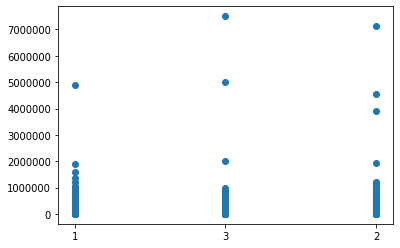

In [93]:
plt.scatter(train_df['Interest_Rate'].astype(str),train_df['Annual_Income'])

We could see that there one or 2 Employees above 50 lac are availing interest rate 2 and 3

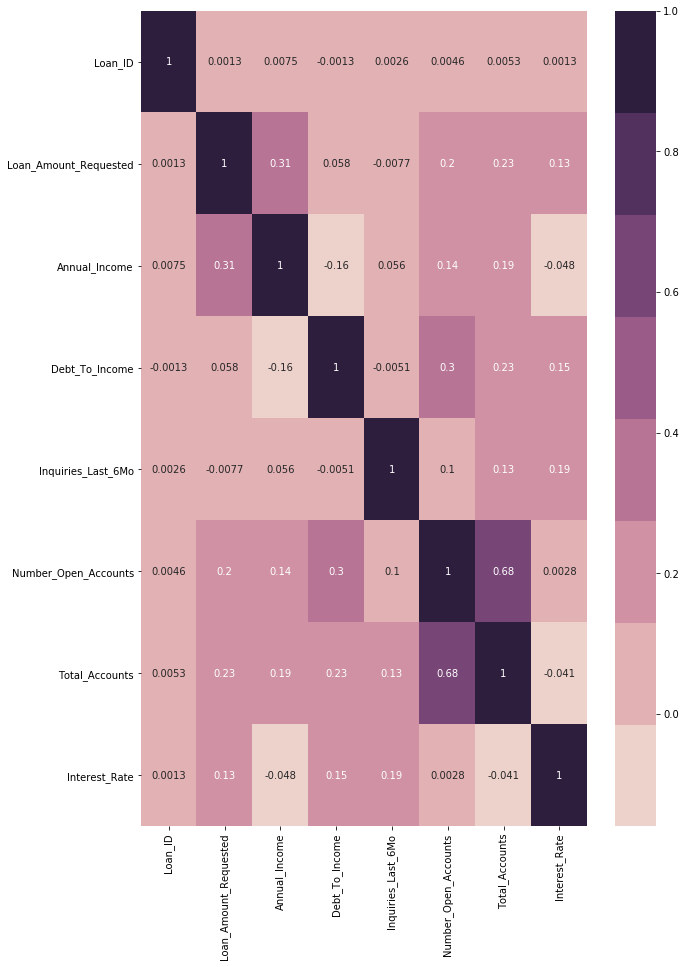

In [95]:
plt.figure(figsize=(10,15))
sns.heatmap(train_df.corr(),annot=True,cmap=sns.cubehelix_palette(8))

Number_Open_Accounts and Total_Accounts has high correlation. We could select one among them and do the model building  
Moreover we could see relationship between Interest Rate and rest of the independent variable the correlation strength  
is low.

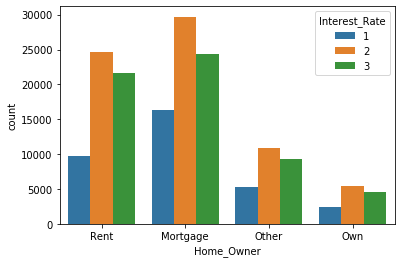

In [98]:
sns.countplot(train_df['Home_Owner'],hue=train_df['Interest_Rate'].astype(str))

For all the categories of 'Home_Owner' we could see 'Interest_Rate' category '2' is the most offered/preffered category

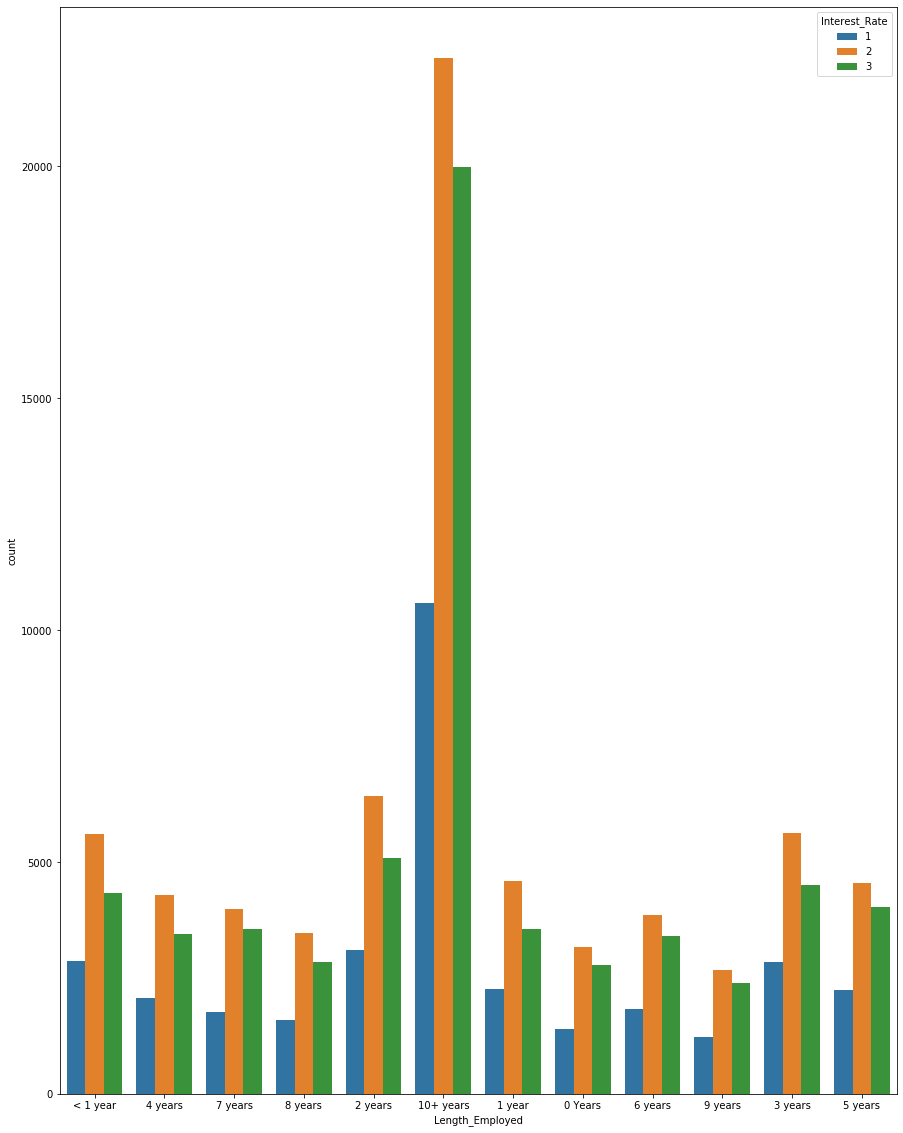

In [100]:
plt.figure(figsize=(15,20))
sns.countplot(train_df['Length_Employed'],hue=train_df['Interest_Rate'].astype(str))

Even based on experience of employees we could see type 2 category of 'Interest_Rate' is the most offered/prefferd choice.

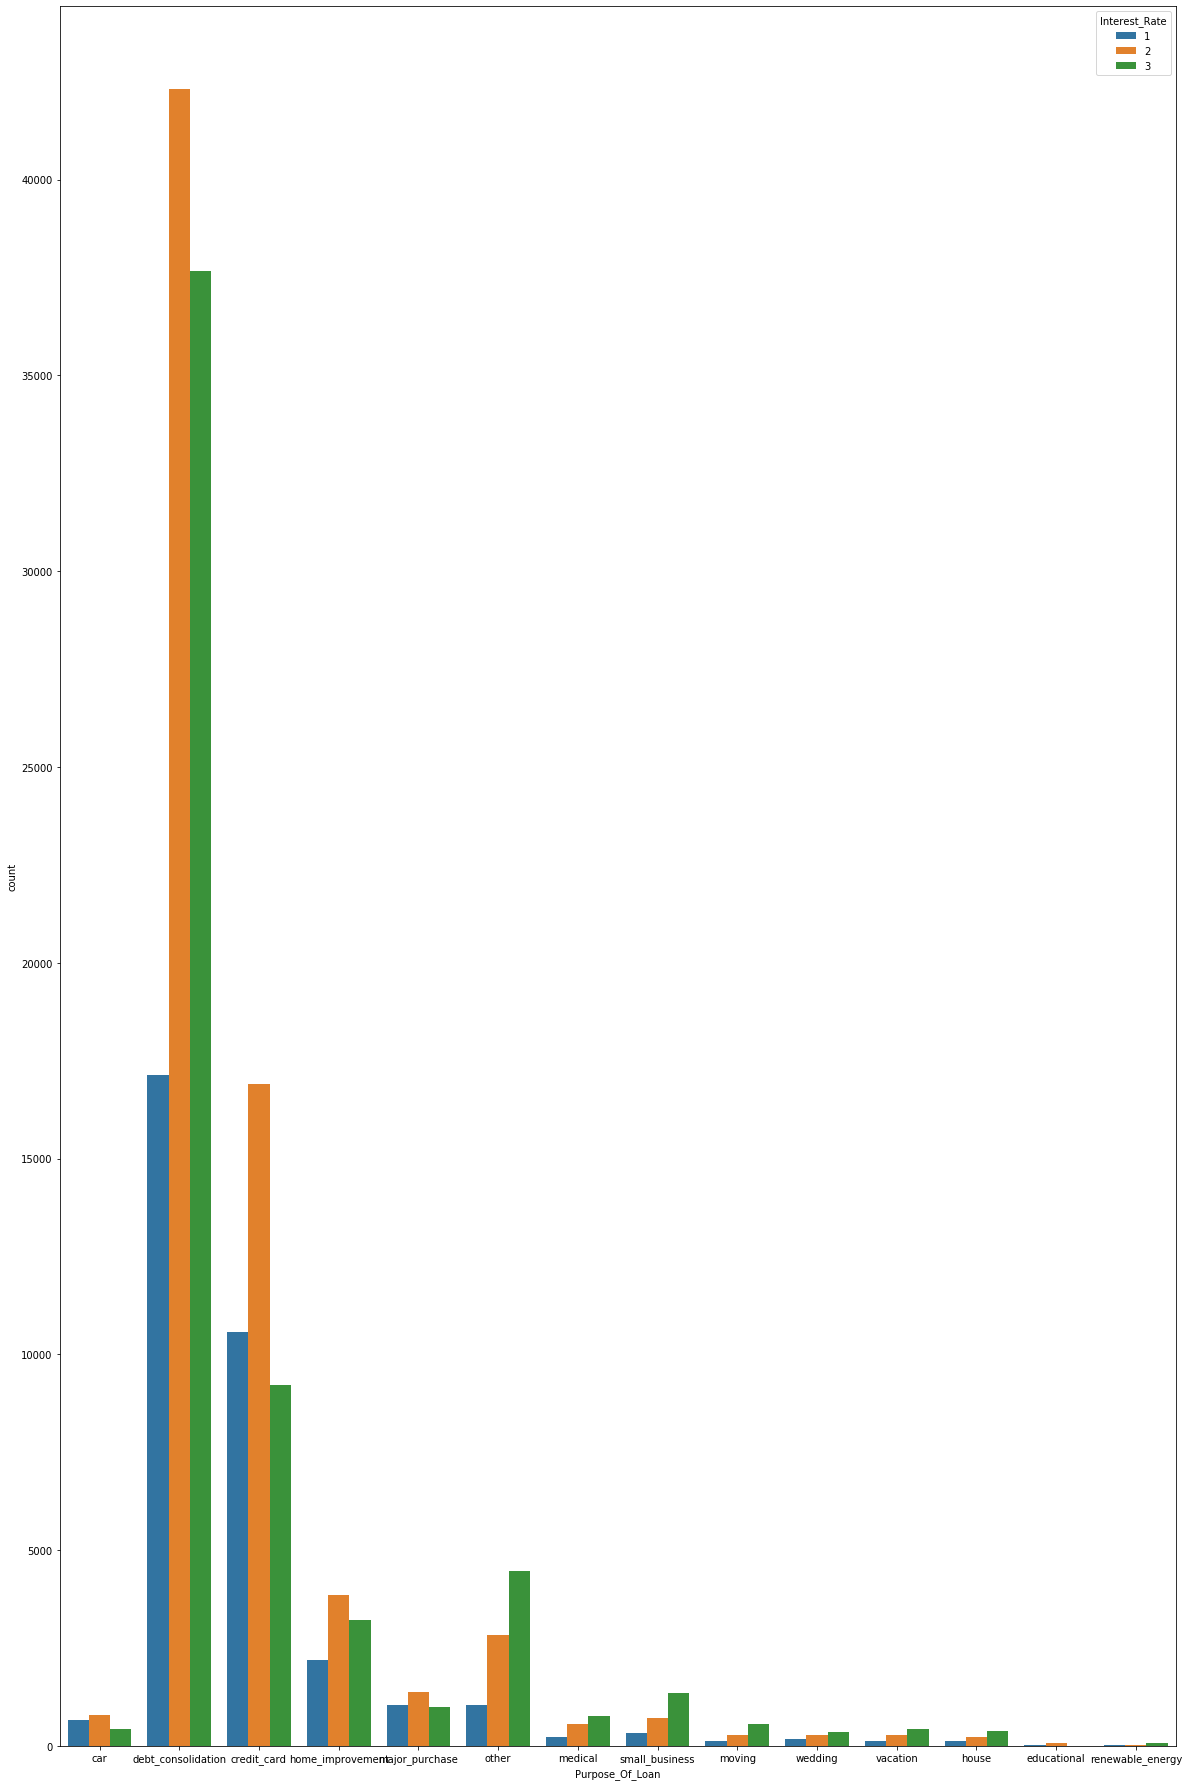

In [104]:
plt.figure(figsize=(20,32))
sns.countplot(train_df['Purpose_Of_Loan'],hue=train_df['Interest_Rate'].astype(str))

Here 'oher','medical','small_business','moving','wedding','vacation' and 'house' has '3' type 'Interest_Rate' the most  
whereas rest of the categories dominated by the '2' type 'Interest_Rate'

In [105]:
print(train_df.describe())
print('*'*40)
print(test_df.describe())

            Loan_ID  Loan_Amount_Requested  Annual_Income  Debt_To_Income  \
count  1.643090e+05           164309.00000   1.643090e+05   164309.000000   
mean   1.008216e+07            14349.33692   7.333396e+04       17.207189   
std    4.743207e+04             8281.86870   5.563855e+04        7.845083   
min    1.000000e+07              500.00000   4.000000e+03        0.000000   
25%    1.004108e+07             8000.00000   4.860000e+04       11.370000   
50%    1.008216e+07            12075.00000   6.900000e+04       16.840000   
75%    1.012323e+07            20000.00000   8.200000e+04       22.780000   
max    1.016431e+07            35000.00000   7.500000e+06       39.990000   

       Inquiries_Last_6Mo  Number_Open_Accounts  Total_Accounts  Interest_Rate  
count       164309.000000         164309.000000   164309.000000  164309.000000  
mean             0.781698             11.193818       25.067665       2.158951  
std              1.034747              4.991813       11.583067

We will take either Number_Open_Accounts or Total_Accounts into model building.Here we will take Number_Open_Accounts.

In [12]:
train_df.drop('Total_Accounts',axis=1,inplace=True)
test_df.drop('Total_Accounts',axis=1,inplace=True)

In [13]:
train_df.loc[(train_df['Annual_Income']>=0) & (train_df['Annual_Income']<=500000),'Annual_Income']=0
train_df.loc[(train_df['Annual_Income']>500000) & (train_df['Annual_Income']<=1000000),'Annual_Income']=1
train_df.loc[train_df['Annual_Income']>1000000,'Annual_Income']=2

In [14]:
test_df.loc[(test_df['Annual_Income']>=0) & (test_df['Annual_Income']<=500000),'Annual_Income']=0
test_df.loc[(test_df['Annual_Income']>500000) & (test_df['Annual_Income']<=1000000),'Annual_Income']=1
test_df.loc[test_df['Annual_Income']>1000000,'Annual_Income']=2

In [15]:
train_df.loc[(train_df['Loan_Amount_Requested']>=0) & (train_df['Loan_Amount_Requested']<=10000),'Loan_Amount_Requested']=0
train_df.loc[(train_df['Loan_Amount_Requested']>10000) & (train_df['Loan_Amount_Requested']<=20000),'Loan_Amount_Requested']=1
train_df.loc[(train_df['Loan_Amount_Requested']>20000) & (train_df['Loan_Amount_Requested']<=30000),'Loan_Amount_Requested']=2
train_df.loc[(train_df['Loan_Amount_Requested']>30000) & (train_df['Loan_Amount_Requested']<=40000),'Loan_Amount_Requested']=3

In [16]:
test_df.loc[(test_df['Loan_Amount_Requested']>=0) & (test_df['Loan_Amount_Requested']<=10000),'Loan_Amount_Requested']=0
test_df.loc[(test_df['Loan_Amount_Requested']>10000) & (test_df['Loan_Amount_Requested']<=20000),'Loan_Amount_Requested']=1
test_df.loc[(test_df['Loan_Amount_Requested']>20000) & (test_df['Loan_Amount_Requested']<=30000),'Loan_Amount_Requested']=2
test_df.loc[(test_df['Loan_Amount_Requested']>30000) & (test_df['Loan_Amount_Requested']<=40000),'Loan_Amount_Requested']=3

In [17]:
train_df.loc[(train_df['Debt_To_Income']>=0) & (train_df['Debt_To_Income']<=10),'Debt_To_Income']=0
train_df.loc[(train_df['Debt_To_Income']>10) & (train_df['Debt_To_Income']<=20),'Debt_To_Income']=1
train_df.loc[(train_df['Debt_To_Income']>20) & (train_df['Debt_To_Income']<=30),'Debt_To_Income']=2
train_df.loc[(train_df['Debt_To_Income']>30) & (train_df['Debt_To_Income']<=40),'Debt_To_Income']=3

In [18]:
test_df.loc[(test_df['Debt_To_Income']>=0) & (test_df['Debt_To_Income']<=10),'Debt_To_Income']=0
test_df.loc[(test_df['Debt_To_Income']>10) & (test_df['Debt_To_Income']<=20),'Debt_To_Income']=1
test_df.loc[(test_df['Debt_To_Income']>20) & (test_df['Debt_To_Income']<=30),'Debt_To_Income']=2
test_df.loc[(test_df['Debt_To_Income']>30) & (test_df['Debt_To_Income']<=40),'Debt_To_Income']=3

In [19]:
train_df.loc[(train_df['Number_Open_Accounts']>=0) & (train_df['Number_Open_Accounts']<=25),'Number_Open_Accounts']=0
train_df.loc[(train_df['Number_Open_Accounts']>25) & (train_df['Number_Open_Accounts']<=50),'Number_Open_Accounts']=1
train_df.loc[(train_df['Number_Open_Accounts']>50) & (train_df['Number_Open_Accounts']<=75),'Number_Open_Accounts']=2
train_df.loc[(train_df['Number_Open_Accounts']>75) & (train_df['Number_Open_Accounts']<=100),'Number_Open_Accounts']=3

In [20]:
test_df.loc[(test_df['Number_Open_Accounts']>=0) & (test_df['Number_Open_Accounts']<=25),'Number_Open_Accounts']=0
test_df.loc[(test_df['Number_Open_Accounts']>25) & (test_df['Number_Open_Accounts']<=50),'Number_Open_Accounts']=1
test_df.loc[(test_df['Number_Open_Accounts']>50) & (test_df['Number_Open_Accounts']<=75),'Number_Open_Accounts']=2
test_df.loc[(test_df['Number_Open_Accounts']>75) & (test_df['Number_Open_Accounts']<=100),'Number_Open_Accounts']=3

In [21]:
train_df.loc[train_df['Gender']=='Male','Gender']=0
train_df.loc[train_df['Gender']=='Female','Gender']=1
test_df.loc[test_df['Gender']=='Male','Gender']=0
test_df.loc[test_df['Gender']=='Female','Gender']=1
train_df['Gender']=train_df['Gender'].astype('float64')
test_df['Gender']=test_df['Gender'].astype('float64')

In [121]:
train_bkup['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [22]:
train_df.loc[(train_df['Purpose_Of_Loan']=='home_improvement') | (train_df['Purpose_Of_Loan']=='house') | \
         (train_df['Purpose_Of_Loan']=='vacation') | (train_df['Purpose_Of_Loan']=='wedding') | \
         (train_df['Purpose_Of_Loan']=='medical')  | (train_df['Purpose_Of_Loan']=='moving') | \
         (train_df['Purpose_Of_Loan']=='car') | (train_df['Purpose_Of_Loan']=='educational'),'Purpose_Of_Loan']=0
train_df.loc[train_df['Purpose_Of_Loan']=='debt_consolidation','Purpose_Of_Loan']=1
train_df.loc[train_df['Purpose_Of_Loan']=='credit_card','Purpose_Of_Loan']=2
train_df.loc[(train_df['Purpose_Of_Loan']=='other') | (train_df['Purpose_Of_Loan']=='major_purchase') | \
         (train_df['Purpose_Of_Loan']=='renewable_energy'),'Purpose_Of_Loan']=3         
train_df.loc[train_df['Purpose_Of_Loan']=='small_business','Purpose_Of_Loan']=4
train_df['Purpose_Of_Loan']=train_df['Purpose_Of_Loan'].astype('float64')

In [23]:
test_df.loc[(test_df['Purpose_Of_Loan']=='home_improvement') | (test_df['Purpose_Of_Loan']=='house') | \
         (test_df['Purpose_Of_Loan']=='vacation') | (test_df['Purpose_Of_Loan']=='wedding') | \
         (test_df['Purpose_Of_Loan']=='medical')  | (test_df['Purpose_Of_Loan']=='moving') | \
         (test_df['Purpose_Of_Loan']=='car') | (test_df['Purpose_Of_Loan']=='educational'),'Purpose_Of_Loan']=0
test_df.loc[test_df['Purpose_Of_Loan']=='debt_consolidation','Purpose_Of_Loan']=1
test_df.loc[test_df['Purpose_Of_Loan']=='credit_card','Purpose_Of_Loan']=2
test_df.loc[(test_df['Purpose_Of_Loan']=='other') | (test_df['Purpose_Of_Loan']=='major_purchase') | \
         (test_df['Purpose_Of_Loan']=='renewable_energy'),'Purpose_Of_Loan']=3         
test_df.loc[test_df['Purpose_Of_Loan']=='small_business','Purpose_Of_Loan']=4
test_df['Purpose_Of_Loan']=test_df['Purpose_Of_Loan'].astype('float64')

In [24]:
train_df.loc[train_df['Income_Verified']=='not verified','Income_Verified']=0
train_df.loc[(train_df['Income_Verified']=='VERIFIED - income') | (train_df['Income_Verified']=='VERIFIED - income source'),'Income_Verified']=1
train_df['Income_Verified']=train_df['Income_Verified'].astype('float64')

In [25]:
test_df.loc[test_df['Income_Verified']=='not verified','Income_Verified']=0
test_df.loc[(test_df['Income_Verified']=='VERIFIED - income') | (test_df['Income_Verified']=='VERIFIED - income source') \
             ,'Income_Verified']=1
test_df['Income_Verified']=test_df['Income_Verified'].astype('float64')

In [26]:
train_df.loc[train_df['Home_Owner']=='Mortgage','Home_Owner']=0
train_df.loc[train_df['Home_Owner']=='Rent','Home_Owner']=1
train_df.loc[train_df['Home_Owner']=='Other','Home_Owner']=2
train_df.loc[train_df['Home_Owner']=='Own','Home_Owner']=3
train_df['Home_Owner']=train_df['Home_Owner'].astype('float64')

In [27]:
test_df.loc[test_df['Home_Owner']=='Mortgage','Home_Owner']=0
test_df.loc[test_df['Home_Owner']=='Rent','Home_Owner']=1
test_df.loc[test_df['Home_Owner']=='Other','Home_Owner']=2
test_df.loc[test_df['Home_Owner']=='Own','Home_Owner']=3
test_df['Home_Owner']=test_df['Home_Owner'].astype('float64')

In [28]:
train_df.loc[(train_df['Length_Employed']=='< 1 year') | (train_df['Length_Employed']=='1 year') | \
         (train_df['Length_Employed']=='0 Years') |  (train_df['Length_Employed']=='2 years') | \
         (train_df['Length_Employed']=='3 years') |  (train_df['Length_Employed']=='4 years') | \
         (train_df['Length_Employed']=='5 years'),'Length_Employed']=0
train_df.loc[(train_df['Length_Employed']=='6 years') | (train_df['Length_Employed']=='7 years') | \
             (train_df['Length_Employed']=='8 years') | (train_df['Length_Employed']=='9 years'),'Length_Employed']=1
train_df.loc[train_df['Length_Employed']=='10+ years','Length_Employed']=2
train_df['Length_Employed']=train_df['Length_Employed'].astype('float64')

In [29]:
test_df.loc[(test_df['Length_Employed']=='< 1 year') | (test_df['Length_Employed']=='1 year') | \
         (test_df['Length_Employed']=='0 Years') |  (test_df['Length_Employed']=='2 years') | \
         (test_df['Length_Employed']=='3 years') |  (test_df['Length_Employed']=='4 years') | \
         (test_df['Length_Employed']=='5 years'),'Length_Employed']=0
test_df.loc[(test_df['Length_Employed']=='6 years') | (test_df['Length_Employed']=='7 years') | \
             (test_df['Length_Employed']=='8 years') | (test_df['Length_Employed']=='9 years'),'Length_Employed']=1
test_df.loc[test_df['Length_Employed']=='10+ years','Length_Employed']=2
test_df['Length_Employed']=test_df['Length_Employed'].astype('float64')

In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                109541 non-null  int64  
 1   Loan_Amount_Requested  109541 non-null  int64  
 2   Length_Employed        109541 non-null  float64
 3   Home_Owner             109541 non-null  float64
 4   Annual_Income          109541 non-null  float64
 5   Income_Verified        109541 non-null  float64
 6   Purpose_Of_Loan        109541 non-null  float64
 7   Debt_To_Income         109541 non-null  float64
 8   Inquiries_Last_6Mo     109541 non-null  int64  
 9   Number_Open_Accounts   109541 non-null  int64  
 10  Gender                 109541 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 9.2 MB


In [138]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164310 entries, 0 to Gender
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  float64
 1   Loan_Amount_Requested  164309 non-null  float64
 2   Length_Employed        164309 non-null  float64
 3   Home_Owner             164309 non-null  float64
 4   Annual_Income          164309 non-null  float64
 5   Income_Verified        164310 non-null  int64  
 6   Purpose_Of_Loan        164310 non-null  int64  
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  float64
 9   Number_Open_Accounts   164309 non-null  float64
 10  Gender                 164309 non-null  float64
 11  Interest_Rate          164309 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 21.3+ MB


In [54]:
#train_bkup2=train_df.copy()
#test_bkup2=test_df.copy()

In [120]:
train_df=train_bkup2.copy()
test_df=test_bkup2.copy()

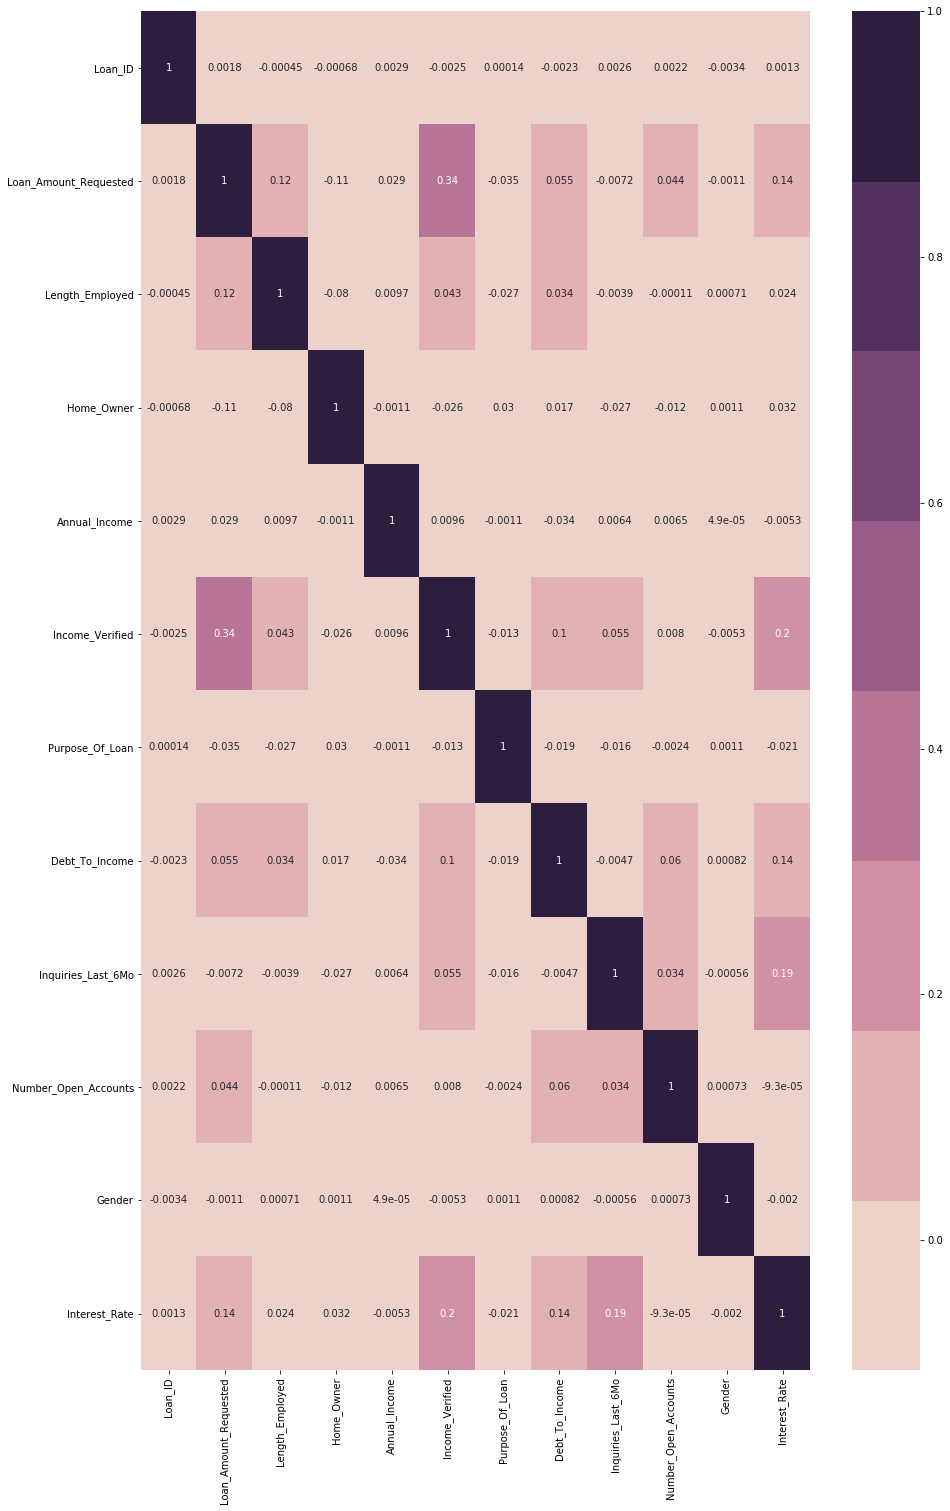

In [56]:
plt.figure(figsize=(15,25))
sns.heatmap(train_df.corr(),annot=True,cmap=sns.cubehelix_palette(8))

In [121]:
train_df.drop(['Number_Open_Accounts','Gender'],axis=1,inplace=True)

In [122]:
test_df.drop(['Number_Open_Accounts','Gender'],axis=1,inplace=True)

In [59]:
ts_loan_id=test_df['Loan_ID']
tr_loan_id=train_df['Loan_ID']

In [123]:
X_test=test_df.drop('Loan_ID',axis=1)

In [124]:
X_train=train_df.drop(['Loan_ID','Interest_Rate'],axis=1)

In [125]:
Y_train=train_df['Interest_Rate']

In [34]:
 from sklearn.naive_bayes import GaussianNB

In [35]:
rfcl=RandomForestClassifier()
adboost=xgb.XGBClassifier()
knn=KNeighborsClassifier()

In [36]:
GB=GaussianNB()

In [126]:
rfcl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rfcl.score(X_train,Y_train)

0.5253090214169643

In [88]:
GB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
GB.score(X_train,Y_train)

0.4897358026644919

In [128]:
adboost.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
adboost.score(X_train,Y_train)

0.5114692439245567

In [110]:
rf_pred=rfcl.predict(X_test)

In [111]:
data={'Loan_ID':ts_loan_id,'Interest_Rate':rf_pred}

In [112]:
final_df=pd.DataFrame(data)

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Loan_ID        109541 non-null  int64
 1   Interest_Rate  109541 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [113]:
final_df.to_csv('D:\\ANALYTICS\\HACKATHONS\\JANATAHACK-Analytics Vidhya\\AV_Submission_31052020_V6.csv')

In [130]:
xgb_pred=adboost.predict(X_test)

In [131]:
data={'Loan_ID':ts_loan_id,'Interest_Rate':xgb_pred}

In [132]:
final_df=pd.DataFrame(data)

In [133]:
final_df.to_csv('D:\\ANALYTICS\\HACKATHONS\\JANATAHACK-Analytics Vidhya\\AV_Submission_31052020_V8.csv')